In [1398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1374]:
df = pd.read_csv("wafer.csv")
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [1376]:
#Dropping Unnamed columns as its not necessary
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

In [1207]:
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [1378]:
# Find if there is any duplicate values
df.duplicated().sum()
# No duplicate values

0

In [1380]:
df.shape

(100, 591)

In [1210]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [1382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 591 entries, Sensor-1 to Good/Bad
dtypes: float64(494), int64(97)
memory usage: 461.8 KB


In [1212]:
# Dropping the columns where null values are greater then 30% as even though we fill them it will create noise

In [1384]:
cols = []
for col in df.columns:
    if (df[col].isnull().sum()) > 30:
        df.drop([col], axis = 1 , inplace = True)
        cols.append(col)

In [1386]:
# Filling the null values with Median as outlier is not treated
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [1388]:
df.isnull().sum()

Sensor-1      0
Sensor-2      0
Sensor-3      0
Sensor-4      0
Sensor-5      0
Sensor-6      0
Sensor-7      0
Sensor-8      0
Sensor-9      0
Sensor-10     0
Sensor-11     0
Sensor-12     0
Sensor-13     0
Sensor-14     0
Sensor-15     0
Sensor-16     0
Sensor-17     0
Sensor-18     0
Sensor-19     0
Sensor-20     0
Sensor-21     0
Sensor-22     0
Sensor-23     0
Sensor-24     0
Sensor-25     0
Sensor-26     0
Sensor-27     0
Sensor-28     0
Sensor-29     0
Sensor-30     0
Sensor-31     0
Sensor-32     0
Sensor-33     0
Sensor-34     0
Sensor-35     0
Sensor-36     0
Sensor-37     0
Sensor-38     0
Sensor-39     0
Sensor-40     0
Sensor-41     0
Sensor-42     0
Sensor-43     0
Sensor-44     0
Sensor-45     0
Sensor-46     0
Sensor-47     0
Sensor-48     0
Sensor-49     0
Sensor-50     0
Sensor-51     0
Sensor-52     0
Sensor-53     0
Sensor-54     0
Sensor-55     0
Sensor-56     0
Sensor-57     0
Sensor-58     0
Sensor-59     0
Sensor-60     0
Sensor-61     0
Sensor-62     0
Sensor-6

In [1390]:
df.head(10)

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,...,17.6552,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,...,11.8075,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,...,17.6552,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,...,17.6552,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,...,15.1082,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
5,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940,-0.0073,...,10.5084,0.5033,0.0154,0.0043,3.0647,0.0099,0.0113,0.0038,114.2878,-1
6,2953.59,2504.86,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4517,0.0069,...,15.1082,0.4963,0.0156,0.0038,3.1427,0.0099,0.0113,0.0038,114.2878,-1
7,3086.52,2360.04,2204.2333,2110.8288,1.6392,100.0,89.0356,0.1245,1.4798,0.0046,...,11.5777,0.4925,0.0145,0.0038,2.9486,0.0099,0.0113,0.0038,114.2878,-1
8,3048.76,2545.68,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4563,0.0075,...,10.5084,0.5032,0.0129,0.0034,2.5678,0.0099,0.0113,0.0038,114.2878,-1
9,2984.06,2619.60,2225.0222,1730.8480,1.5333,100.0,98.5978,0.1232,1.4696,0.0081,...,17.6552,0.4978,0.0133,0.0032,2.6765,0.0128,0.0193,0.0060,151.1930,-1


In [1392]:
# Class is Imbalanced
df['Good/Bad'].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

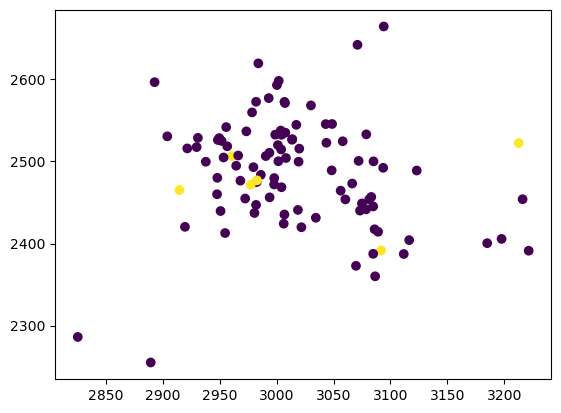

In [1404]:
plt.scatter(df['Sensor-1'], df['Sensor-2'], c = df['Good/Bad'])

In [ ]:
# Using SMOTE technique has class is imblance

In [1406]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [1236]:
list(df.columns)[:-1]

['Sensor-1',
 'Sensor-2',
 'Sensor-3',
 'Sensor-4',
 'Sensor-5',
 'Sensor-6',
 'Sensor-7',
 'Sensor-8',
 'Sensor-9',
 'Sensor-10',
 'Sensor-11',
 'Sensor-12',
 'Sensor-13',
 'Sensor-14',
 'Sensor-15',
 'Sensor-16',
 'Sensor-17',
 'Sensor-18',
 'Sensor-19',
 'Sensor-20',
 'Sensor-21',
 'Sensor-22',
 'Sensor-23',
 'Sensor-24',
 'Sensor-25',
 'Sensor-26',
 'Sensor-27',
 'Sensor-28',
 'Sensor-29',
 'Sensor-30',
 'Sensor-31',
 'Sensor-32',
 'Sensor-33',
 'Sensor-34',
 'Sensor-35',
 'Sensor-36',
 'Sensor-37',
 'Sensor-38',
 'Sensor-39',
 'Sensor-40',
 'Sensor-41',
 'Sensor-42',
 'Sensor-43',
 'Sensor-44',
 'Sensor-45',
 'Sensor-46',
 'Sensor-47',
 'Sensor-48',
 'Sensor-49',
 'Sensor-50',
 'Sensor-51',
 'Sensor-52',
 'Sensor-53',
 'Sensor-54',
 'Sensor-55',
 'Sensor-56',
 'Sensor-57',
 'Sensor-58',
 'Sensor-59',
 'Sensor-60',
 'Sensor-61',
 'Sensor-62',
 'Sensor-63',
 'Sensor-64',
 'Sensor-65',
 'Sensor-66',
 'Sensor-67',
 'Sensor-68',
 'Sensor-69',
 'Sensor-70',
 'Sensor-71',
 'Sensor-72',
 

In [1408]:
x, y = oversample.fit_resample(df[list(df.columns)[:-1]], df[list(df.columns)[-1]])

In [1410]:
x.shape, y.shape

((188, 562), (188,))

In [1412]:
df_1 = pd.DataFrame(x, columns = list(df.columns)[:-1])

In [1414]:
df_1.shape

(188, 562)

In [1416]:
[list(df.columns)[-1]]

['Good/Bad']

In [1418]:
df_2 = pd.DataFrame(y, columns = [list(df.columns)[-1]])
df_2.shape

(188, 1)

In [1420]:
df_final_smote = pd.concat([df_1,df_2], axis = 1)

In [1422]:
df_final_smote['Good/Bad'].value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [ ]:
df_final_smote.columns

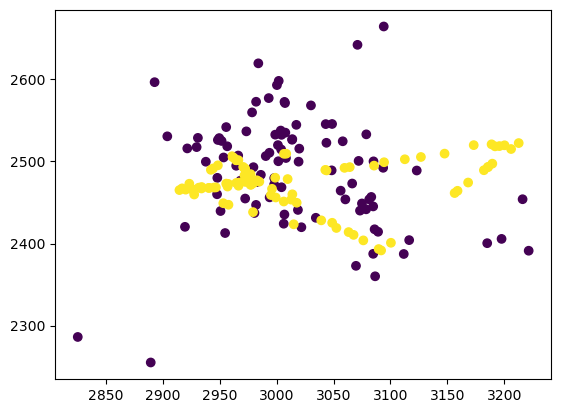

In [1424]:
# Final Data_Frame after applying smoothing Technique
plt.scatter(df_final_smote['Sensor-1'], df_final_smote['Sensor-2'], c = df_final_smote['Good/Bad'])

In [ ]:
df_final_smote.shape

In [ ]:
df_final_smote['Good/Bad'].value_counts()

In [1252]:
# df_final_smote['Good/Bad'] = df_final_smote['Good/Bad'].replace(-1,0)

In [1426]:
df_final_smote['Good/Bad'].value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [1428]:
# Divide x and y
x = df_final_smote.drop(["Good/Bad"], axis = 1)
y = df_final_smote['Good/Bad']

In [1430]:
x.shape, y.shape

((188, 562), (188,))

In [1432]:
# Train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)

In [1434]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((150, 562), (150,), (38, 562), (38,))

In [1436]:
# Model Training
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [1444]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [1440]:
kf = KFold(n_splits = 3, shuffle=True, random_state=None) 

In [1456]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train, y_train, cv = kf)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    model_score = accuracy_score(y_test,y_pred)
    print("Scores", scores * 100)
    print(f"Accuracy score of {model} is {model_score * 100}") 
    print("*"*35)
    report.append(model_score*100)
    model_list.append(list(models.keys())[i])
    

print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")

Scores [96. 98. 92.]
Accuracy score of LogisticRegressionCV() is 97.36842105263158
***********************************
Scores [58. 82. 72.]
Accuracy score of SVC() is 73.68421052631578
***********************************
Scores [94. 92. 98.]
Accuracy score of LinearSVC() is 100.0
***********************************
Scores [100. 100. 100.]
Accuracy score of RandomForestClassifier() is 100.0
***********************************
Scores [96. 94. 98.]
Accuracy score of AdaBoostClassifier() is 100.0
***********************************
Scores [92. 94. 96.]
Accuracy score of GradientBoostingClassifier() is 97.36842105263158
***********************************
Scores [88. 94. 96.]
Accuracy score of DecisionTreeClassifier() is 97.36842105263158
***********************************
Scores [100. 100.  98.]
Accuracy score of GaussianNB() is 100.0
***********************************
Model with highest accuracy is -> 100.0. Model name is LSVC


In [1458]:
model_list

['LR', 'SVC', 'LSVC', 'RFC', 'ABC', 'GBC', 'DTC', 'GNB']

In [1460]:
report

[97.36842105263158,
 73.68421052631578,
 100.0,
 100.0,
 100.0,
 97.36842105263158,
 97.36842105263158,
 100.0]

In [1462]:
# With SMOTE

In [1468]:
df.columns

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-578', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=563)

In [1472]:
x = df.drop(["Good/Bad"],axis =1)
y = df["Good/Bad"]

In [1478]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)

In [1484]:
report

[95.0, 95.0, 90.0, 95.0, 95.0, 85.0, 85.0, 95.0]

In [1486]:
# PCA

In [1488]:
from sklearn.decomposition import PCA

In [1492]:
x_train.shape

(80, 562)

In [1490]:
pca  = PCA()
pca

PCA()

In [1494]:
x_train = pca.fit_transform(x_train)

In [1496]:
x_train.shape

(80, 80)

In [1498]:
pca.components_

array([[ 3.70673068e-04, -2.85625501e-04,  2.00850247e-04, ...,
         4.08173997e-08,  9.22781327e-09, -1.00530763e-04],
       [-2.58010924e-03,  8.40199220e-04,  2.20349719e-04, ...,
         2.19349817e-07,  6.93555511e-08,  1.53667284e-03],
       [-2.16603649e-03,  1.54026021e-03, -6.63128911e-04, ...,
        -3.37750941e-07, -7.43839079e-08, -2.04202556e-03],
       ...,
       [ 1.38918364e-02, -1.11717654e-02, -2.49668629e-02, ...,
         5.04864479e-05, -2.38010556e-05, -2.77291156e-02],
       [ 2.30973410e-02,  3.73260755e-02, -2.34339636e-02, ...,
        -1.15133482e-04, -3.05228480e-05, -3.94851479e-02],
       [-1.33176230e-03,  4.52901221e-03,  8.09157254e-02, ...,
         5.88933327e-05,  9.88838162e-06, -1.14526112e-02]])

In [1500]:
pca.explained_variance_ratio_

array([7.18332511e-01, 1.58706451e-01, 9.45682448e-02, 8.62541959e-03,
       4.52598111e-03, 2.50943569e-03, 1.64539790e-03, 1.34656123e-03,
       1.29828656e-03, 1.15335861e-03, 9.23056361e-04, 8.18239729e-04,
       6.26896076e-04, 6.11749615e-04, 5.70928252e-04, 4.66666413e-04,
       4.50212528e-04, 3.72941108e-04, 3.25709738e-04, 3.01062728e-04,
       2.99934945e-04, 2.77087126e-04, 2.23858430e-04, 1.92364608e-04,
       1.47732413e-04, 1.28189146e-04, 1.15925400e-04, 6.37037083e-05,
       6.14813027e-05, 5.61650738e-05, 3.83572011e-05, 3.28435114e-05,
       2.96265988e-05, 2.09972128e-05, 1.87558582e-05, 1.59610362e-05,
       1.40629891e-05, 1.24450013e-05, 1.05834990e-05, 9.16179341e-06,
       7.09721854e-06, 6.21652019e-06, 4.77526611e-06, 4.56415255e-06,
       4.12608301e-06, 3.53712794e-06, 2.44800099e-06, 2.26930246e-06,
       2.12320399e-06, 1.90446522e-06, 1.60099292e-06, 1.41281860e-06,
       1.32693349e-06, 1.09945991e-06, 9.99099712e-07, 8.62411493e-07,
      

In [1502]:
np.cumsum(pca.explained_variance_ratio_)

array([0.71833251, 0.87703896, 0.97160721, 0.98023263, 0.98475861,
       0.98726804, 0.98891344, 0.99026   , 0.99155829, 0.99271165,
       0.9936347 , 0.99445294, 0.99507984, 0.99569159, 0.99626252,
       0.99672918, 0.9971794 , 0.99755234, 0.99787805, 0.99817911,
       0.99847905, 0.99875613, 0.99897999, 0.99917236, 0.99932009,
       0.99944828, 0.9995642 , 0.99962791, 0.99968939, 0.99974555,
       0.99978391, 0.99981675, 0.99984638, 0.99986738, 0.99988613,
       0.99990209, 0.99991616, 0.9999286 , 0.99993919, 0.99994835,
       0.99995544, 0.99996166, 0.99996644, 0.999971  , 0.99997513,
       0.99997866, 0.99998111, 0.99998338, 0.9999855 , 0.99998741,
       0.99998901, 0.99999042, 0.99999175, 0.99999285, 0.99999385,
       0.99999471, 0.99999555, 0.99999619, 0.99999676, 0.99999725,
       0.99999768, 0.99999806, 0.99999841, 0.99999869, 0.99999893,
       0.9999991 , 0.99999926, 0.99999939, 0.9999995 , 0.9999996 ,
       0.99999968, 0.99999974, 0.9999998 , 0.99999985, 0.99999

In [1504]:

# Cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance: ", cumulative_variance)

# Number of components to retain 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance: ", n_components)

Cumulative explained variance:  [0.71833251 0.87703896 0.97160721 0.98023263 0.98475861 0.98726804
 0.98891344 0.99026    0.99155829 0.99271165 0.9936347  0.99445294
 0.99507984 0.99569159 0.99626252 0.99672918 0.9971794  0.99755234
 0.99787805 0.99817911 0.99847905 0.99875613 0.99897999 0.99917236
 0.99932009 0.99944828 0.9995642  0.99962791 0.99968939 0.99974555
 0.99978391 0.99981675 0.99984638 0.99986738 0.99988613 0.99990209
 0.99991616 0.9999286  0.99993919 0.99994835 0.99995544 0.99996166
 0.99996644 0.999971   0.99997513 0.99997866 0.99998111 0.99998338
 0.9999855  0.99998741 0.99998901 0.99999042 0.99999175 0.99999285
 0.99999385 0.99999471 0.99999555 0.99999619 0.99999676 0.99999725
 0.99999768 0.99999806 0.99999841 0.99999869 0.99999893 0.9999991
 0.99999926 0.99999939 0.9999995  0.9999996  0.99999968 0.99999974
 0.9999998  0.99999985 0.99999989 0.99999992 0.99999995 0.99999998
 1.         1.        ]
Number of components to retain 95% variance:  3


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with PCA and a classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('DTC' , DecisionTreeClassifier(random_state=1,))
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(x_test)
accuracy_score(y_pred,y_test